#  performance

In [12]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["performance.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_performance=df
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std,scenario
0,hpccrandomringbw,16,1,1,1.441682,0.245073,none
1,hpccdgemm,16,1,1,22.006625,1.510584,none
2,hpccstream,16,1,1,3.920850,0.700722,none
3,minife,16,1,1,9209.710000,691.571505,none
4,hpccfft,16,1,1,10.686117,2.039649,none
5,hpccrandomringbw,16,1,1,1.892013,0.010203,cpumem
6,hpccdgemm,16,1,1,30.828600,0.527165,cpumem
7,hpccstream,16,1,1,2.772080,0.010818,cpumem
8,minife,16,1,1,8477.370000,24.541586,cpumem
9,hpccfft,16,1,1,9.728100,0.605835,cpumem


In [13]:
# df_performance = df_performance.join(df_time1.set_index('scenario'), on='scenario')
# df_performance['model_time_mean']=df_performance['model_time_mean']/df_performance['duration_sum']

In [14]:
# df_performance

           benchmark  nTasks  nNodes  nWorkers  model_time_mean  \
0   hpccrandomringbw      16       1         1         1.441682   
5   hpccrandomringbw      16       1         1         1.892013   
10  hpccrandomringbw      16       1         1         1.873895   
15  hpccrandomringbw      16       1         1         1.886680   

    model_time_std            scenario  
0         0.245073                none  
5         0.010203              cpumem  
10        0.025932        cpumem-scale  
15        0.006241  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std  \
1   hpccdgemm      16       1         1        22.006625        1.510584   
6   hpccdgemm      16       1         1        30.828600        0.527165   
11  hpccdgemm      16       4         4        32.651525        0.182544   
16  hpccdgemm      16       4        16        37.084275        1.054984   

              scenario  
1                 none  
6               cpumem  
11 

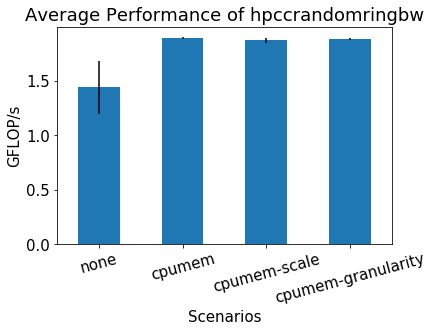

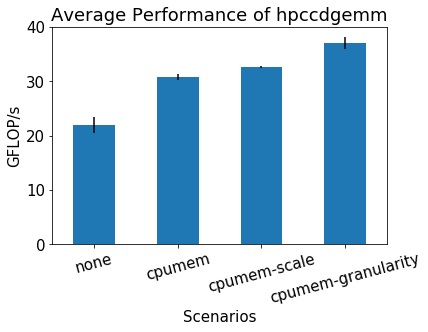

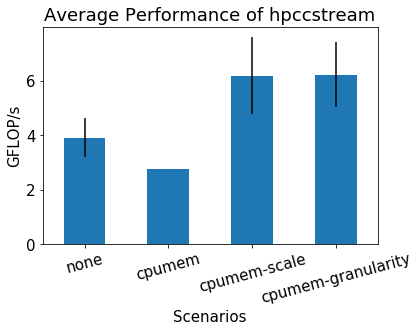

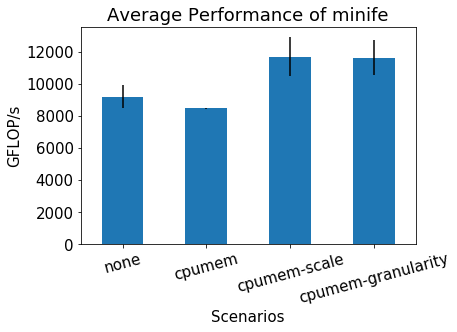

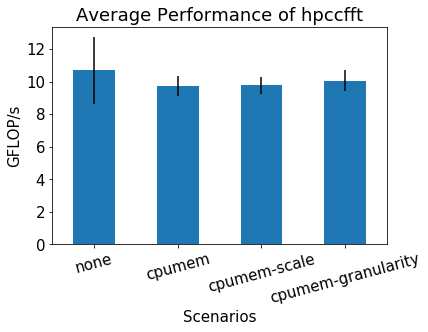

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Performance of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("GFLOP/s")
    
    plt.savefig('performance-'+model_name+'.pdf',bbox_inches='tight',pad_inches=0.1)

#  time

In [16]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["time.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df_time=df
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
0,hpccrandomringbw,16,1,1,184.00,218.833270,736.00,110.310924,0.00,0.000000,960.459222,271.353812,none
1,hpccdgemm,16,1,1,226.50,317.655080,1768.00,138.072445,0.50,0.500000,2033.140596,317.183012,none
2,hpccstream,16,1,1,156.00,258.111410,364.75,39.315232,0.00,0.000000,557.402050,292.802416,none
3,minife,16,1,1,276.50,271.914049,1060.75,72.119259,0.00,0.000000,1374.717350,250.022646,none
4,hpccfft,16,1,1,215.75,224.584477,230.75,28.012274,0.00,0.000000,482.134044,228.024642,none
5,hpccrandomringbw,16,1,1,167.50,203.774998,432.00,2.915476,0.00,0.000000,638.767849,203.114203,cpumem
6,hpccdgemm,16,1,1,173.25,191.058074,1183.75,18.294466,0.00,0.000000,1391.634978,186.269632,cpumem
7,hpccstream,16,1,1,118.25,173.416226,441.00,2.549510,0.00,0.000000,594.425227,174.155412,cpumem
8,minife,16,1,1,205.50,201.579389,1137.50,5.315073,0.00,0.000000,1381.400804,202.489362,cpumem
9,hpccfft,16,1,1,142.25,138.011548,236.25,1.785357,0.00,0.000000,411.688770,138.305210,cpumem


           benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  \
0   hpccrandomringbw      16       1         1     184.00  218.833270   
5   hpccrandomringbw      16       1         1     167.50  203.774998   
10  hpccrandomringbw      16       1         1     165.25  199.025595   
15  hpccrandomringbw      16       1         1     167.25  201.493641   

    run_mean     run_std  final_mean  final_std  duration_mean  duration_std  \
0     736.00  110.310924         0.0        0.0     960.459222    271.353812   
5     432.00    2.915476         0.0        0.0     638.767849    203.114203   
10    439.25    7.949057         0.0        0.0     642.913334    191.926100   
15    439.00    4.636809         0.0        0.0     643.140288    200.675438   

              scenario  
0                 none  
5               cpumem  
10        cpumem-scale  
15  cpumem-granularity  
    benchmark  nTasks  nNodes  nWorkers  init_mean    init_std  run_mean  \
1   hpccdgemm      16       1   

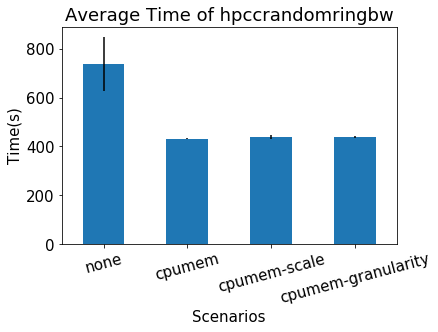

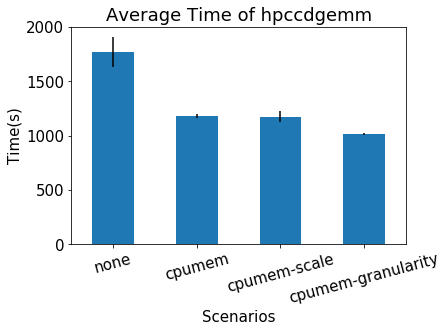

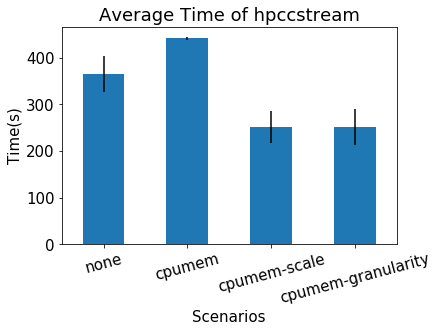

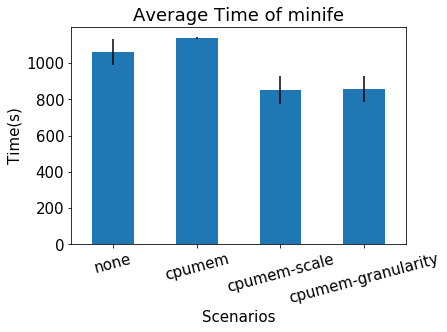

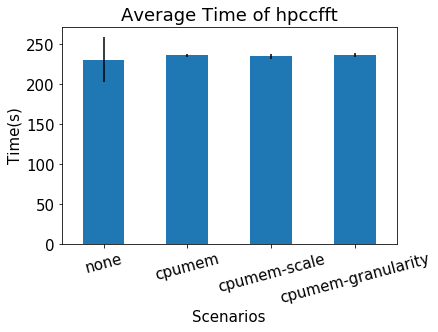

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams.update({'font.size': 15}) # 改变所有字体大小，改变其他性质类似

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='scenario', 
                  y='run_mean',
                  yerr='run_std',
                    kind='bar',
                    stacked=False,
                    title=f"Average Time of {model_name}",
                 legend=None)
    plt.xticks(rotation=15) 
    plt.xlabel("Scenarios")
    plt.ylabel("Time(s)")
    
    plt.savefig('time-'+model_name+'.pdf',bbox_inches='tight',pad_inches=0.1)

#  time slot

In [18]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["appsum.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)

In [19]:
df_time1=df
df_time1

,scenario,init_sum,run_sum,final_sum,duration_sum
0,none,4235.0,16641.0,2.0,21631.413046
1,cpumem,3227.0,13722.0,0.0,17671.670513
2,cpumem-scale,2431.0,11808.0,2.0,15015.615738
3,cpumem-granularity,2438.0,11214.0,4.0,14457.250988


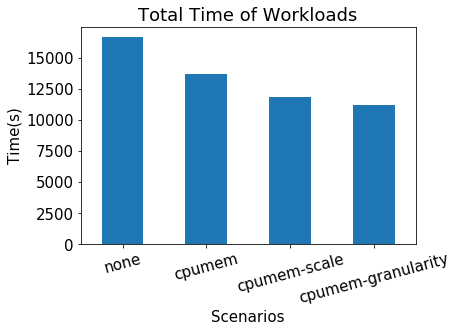

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# for model_name in df_time1['benchmark'].unique():
#     df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
# df_bench['run_sum'] = df_time1['run_sum']

# plot grouped bar chart
df_time1.plot(x='scenario',
              y='run_sum',
                kind='bar',
                stacked=True,
                title=f"Total Time of Workloads",
             legend=None)
plt.xticks(rotation=15) 
plt.xlabel("Scenarios")
plt.ylabel("Time(s)")
    
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)

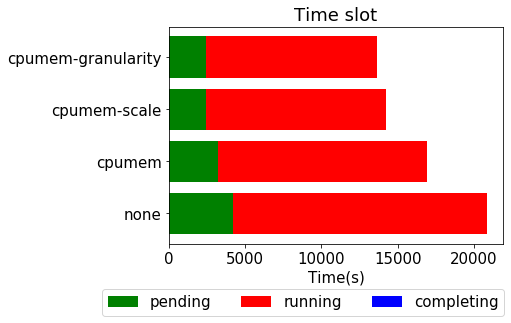

In [21]:
import numpy as np
import matplotlib.pyplot as plt

color=['green','red','blue']

y2 = df_time1['init_sum']
y3 = df_time1['run_sum']
y4 = df_time1['final_sum']

labels = df_time1['scenario']

plt.barh(labels, y2, color='green', label='pending')
plt.barh(labels, y3, left=y2, color='red', label='running')
plt.barh(labels, y4, left=y2+y3, color='blue', label='completing')

# plt.xlim((0,25000))                                                            #x轴标题
plt.legend(loc=[-0.2, -0.33], ncol=3)                                                           #图例的显示位置设置
plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
# plt.legend(loc=[1, 0])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
# plt.show()
plt.savefig('appsum.pdf',bbox_inches='tight',pad_inches=0.1)